In [3]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [10]:
from pandas.tseries.offsets import MonthEnd # 月末
Market_ret = pd.read_csv(r'C:\Users\冤种千斤\Desktop\代码\第六次作业\Marketret_mon_stock2024(1).csv')
Market_ret['month'] = pd.to_datetime(Market_ret['month'], format='%b %Y') + MonthEnd(0)
Market_ret.set_index('month', inplace=True)
Market_ret.sort_index(inplace=True)
Market_ret = Market_ret.drop(columns=['Unnamed: 0'])
Market_ret

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q
month,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2
...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4


In [12]:
inflation = pd.read_csv(r'C:\Users\冤种千斤\Desktop\代码\第五次作业\inflation(1).csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2025-03-31,-0.1
2025-04-30,-0.1
2025-05-31,-0.1


In [ ]:
price_dividend = pd.read_csv('Price_dividend_mon2024.csv')
# 生成和数据框行数相同的月末日期
price_dividend['month'] = pd.date_range(start='1990-12-31', periods=len(price_dividend), freq='M')
price_dividend.set_index('month', inplace=True)
price_dividend.sort_index(inplace=True)
price_dividend = price_dividend
price_dividend#处理价格股利

,Unnamed: 0,pd
month,,
1990-12-31,1,NaN
1991-01-31,2,NaN
1991-02-28,3,NaN
1991-03-31,4,NaN
1991-04-30,5,NaN
...,...,...
2024-08-31,405,10.728048
2024-09-30,406,10.889979
2024-10-31,407,10.862945


In [ ]:
price_earning = pd.read_csv('Price_earnings_mon2024.csv')
price_earning['month'] = pd.date_range(start='1991-01-31', end='2024-12-31', freq='M')
price_earning.set_index('month', inplace=True)
price_earning.sort_index(inplace=True)
price_earning #这个是处理市盈率

,pe
month,
1991-01-31,4.466562
1991-02-28,4.501042
1991-03-31,4.112082
1991-04-30,4.111121
1991-05-31,4.182871
...,...
2024-08-31,2.502897
2024-09-30,2.675435
2024-10-31,2.635010


In [ ]:
price_bookvalue = pd.read_csv('Price_bookvalue_mon2024.csv')
price_bookvalue['month'] = pd.date_range(start='1990-12-31', end='2024-12-31', freq='M')
price_bookvalue.set_index('month', inplace=True)
price_bookvalue.sort_index(inplace=True)
price_bookvalue#处理对应月份的市净值

,pb
month,
1990-12-31,1.886568
1991-01-31,2.080065
1991-02-28,1.949285
1991-03-31,1.560324
1991-04-30,1.970330
...,...
2024-08-31,0.097936
2024-09-30,0.275764
2024-10-31,0.254341


In [ ]:
reg_data = pd.merge(Market_ret,price_dividend,on = 'month')
reg_data = pd.merge(reg_data,price_earning,on = 'month')
reg_data = pd.merge(reg_data,price_bookvalue,on='month')
reg_data = pd.merge(reg_data,inflation,on='month')
reg_data = reg_data[reg_data.index >= '1995-01-31']
reg_data#调动整个对应数据表格

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q,Unnamed: 0,pd,pe,pb,cpi
month,,,,,,,,,,,,,,
1995-01-31,-0.116298,-0.125837,0.008719,-0.125017,-0.134556,-0.041073,-0.105319,-0.244507,1995 Q1,50,11.663551,2.763315,0.804480,24.1
1995-02-28,-0.014059,-0.013693,0.008719,-0.022778,-0.022412,-0.027700,0.092838,-0.166996,1995 Q1,51,11.660139,2.741896,0.783696,22.4
1995-03-31,0.130882,0.146959,0.008719,0.122163,0.138240,0.164264,0.167036,-0.121024,1995 Q1,52,11.798194,2.844483,0.866200,21.3
1995-04-30,-0.104304,-0.101424,0.008719,-0.113023,-0.110143,-0.064104,0.019801,-0.228282,1995 Q2,53,11.587058,2.603794,0.614429,20.7
1995-05-31,0.175455,0.199416,0.008719,0.166736,0.190697,0.121428,0.156143,0.208097,1995 Q2,54,11.589752,2.746883,0.760117,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3,405,10.728048,2.502897,0.097936,0.6
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3,406,10.889979,2.675435,0.275764,0.4
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4,407,10.862945,2.635010,0.254341,0.3


In [ ]:
reg_data['pe'].describe().round(5)#计算偏度

count    360.00000
mean       3.02297
std        0.47233
min        2.33970
25%        2.62983
50%        2.85453
75%        3.47006
max        3.99791
Name: pe, dtype: float64

In [ ]:
reg_data['pb'].skew()
reg_data['pb'].kurtosis()#计算峰度

0.5756635597052367

-0.8558098273039034

In [33]:
from statsmodels.tsa.stattools import adfuller as ADF

# 对月收益率数据进行ADF检验（筛选2000-01-31之后的pd列数据）
adf_result = ADF(reg_data[reg_data.index >= '2000-01-31']['pd'])

print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f' {key}: {value:.4f}')

if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -3.0112
p-value: 0.0339
Critical Values:
 1%: -3.4526
 5%: -2.8713
 10%: -2.5720
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


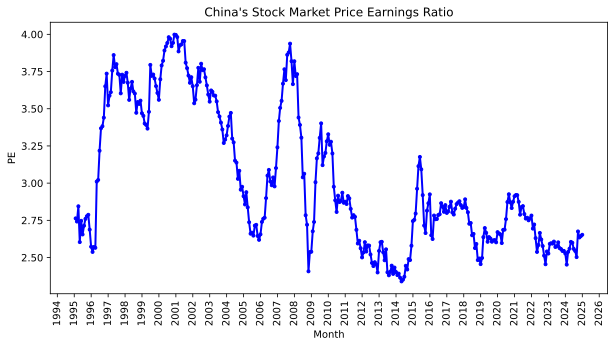

In [35]:
fig = plt.figure(figsize=(10, 5)) # 图片比例
ax = fig.add_subplot(1, 1, 1)  # 定义ax
ax.plot(
    'pe',  # 要画图的变量名
    '.-b',  # 线的类型
    linewidth = 2,  # 线的粗细
    data = reg_data['1995-01-01':'2024-12-31'])  # 画图的数据
plt.title("China's Stock Market Price Earnings Ratio") # 画图的标题
plt.xlabel('Month') # 画图的x轴名称
plt.ylabel('PE') # 画图的y轴名称

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

plt.show();

Text(0.5, 1.0, "China's Stock Market Price Ratios")

Text(0.5, 0, 'Month')

(array([ 8401.,  8766.,  9131.,  9496.,  9862., 10227., 10592., 10957.,
        11323., 11688., 12053., 12418., 12784., 13149., 13514., 13879.,
        14245., 14610., 14975., 15340., 15706., 16071., 16436., 16801.,
        17167., 17532., 17897., 18262., 18628., 18993., 19358., 19723.,
        20089.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

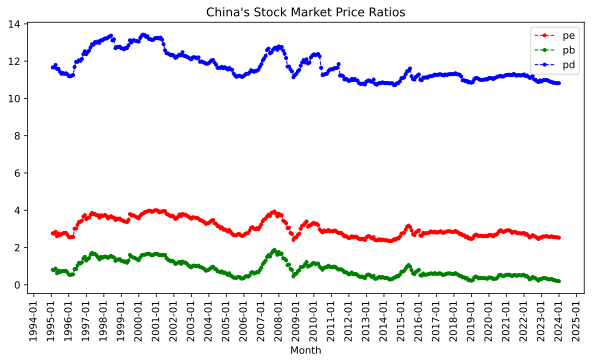

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 假设reg_data是已加载的、日期索引的DataFrame
fig = plt.figure(figsize=(10, 5))  # 图片比例
ax = fig.add_subplot(1, 1, 1)  # 定义子图

# 绘制pe的折线图
ax.plot(
    'pe',  # 要画图的变量名
    '.--r',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['1995-01-01':'2023-12-31']  # 画图的数据
)

# 绘制pb的折线图
ax.plot(
    'pb',  # 要画图的变量名
    '.--g',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['1995-01-01':'2023-12-31']  # 画图的数据
)

# 绘制pd的折线图
ax.plot(
    'pd',  # 要画图的变量名
    '.--b',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['1995-01-01':'2023-12-31']  # 画图的数据
)

# 设置图标题与x轴标签
plt.title("China's Stock Market Price Ratios")  # 补全标题
plt.xlabel('Month')  # x轴名称

# 设置x轴日期显示格式
data_format = mdates.DateFormatter('%Y-%m')  # 指定日期格式（年-月）
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())  # 主刻度按“年”显示

# 旋转x轴日期标签（避免重叠）
plt.xticks(rotation = 90)

# 添加图例（自动识别plot的y列名）
plt.legend()

# 显示图形
plt.show()

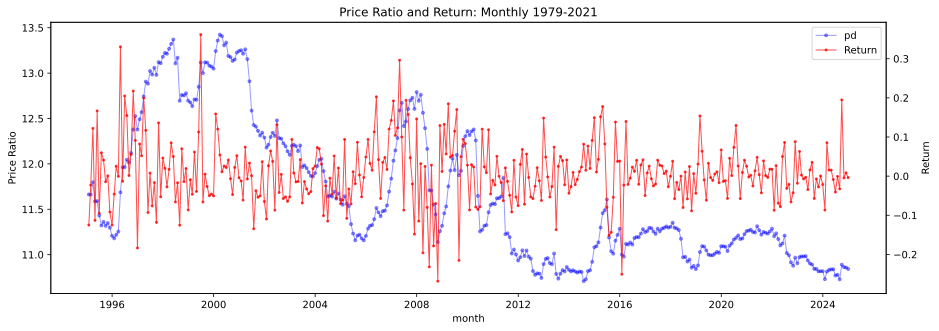

In [40]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['pd'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='pd')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Price Ratio')  # 设置左边纵坐标标签
ax1.set_title("Price Ratio and Return: Monthly 1979-2021")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['ret'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='Return')
ax2.set_ylabel('Return')  # 设置右边纵坐标标签

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

lines,labels = ax1.get_legend_handles_labels()
lines2,labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2,labels+labels2,loc='upper right')

plt.show();

In [ ]:
reg_data['lpd'] = reg_data['pd'].shift(1)
model_fore_pd = smf.ols('ret ~ lpd',
                 data=reg_data['2012-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_pd.summary())#预测收益率的回归分析

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     6.348
Date:                Sun, 09 Nov 2025   Prob (F-statistic):             0.0128
Time:                        11:37:42   Log-Likelihood:                 217.89
No. Observations:                 156   AIC:                            -431.8
Df Residuals:                     154   BIC:                            -425.7
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6940      0.273      2.546      0.0

In [42]:
reg_data['lcpi'] = reg_data['cpi'].shift(2)
model_cpipd = smf.ols('ret ~ lcpi + lpd',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpipd.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3.796
Date:                Sun, 09 Nov 2025   Prob (F-statistic):             0.0236
Time:                        11:38:57   Log-Likelihood:                 354.44
No. Observations:                 300   AIC:                            -702.9
Df Residuals:                     297   BIC:                            -691.8
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0805      0.091      0.882      0.3

In [ ]:
reg_data#再次调用数据

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q,Unnamed: 0,pd,pe,pb,cpi,lpd,lcpi
month,,,,,,,,,,,,,,,,
1995-01-31,-0.116298,-0.125837,0.008719,-0.125017,-0.134556,-0.041073,-0.105319,-0.244507,1995 Q1,50,11.663551,2.763315,0.804480,24.1,NaN,NaN
1995-02-28,-0.014059,-0.013693,0.008719,-0.022778,-0.022412,-0.027700,0.092838,-0.166996,1995 Q1,51,11.660139,2.741896,0.783696,22.4,11.663551,NaN
1995-03-31,0.130882,0.146959,0.008719,0.122163,0.138240,0.164264,0.167036,-0.121024,1995 Q1,52,11.798194,2.844483,0.866200,21.3,11.660139,24.1
1995-04-30,-0.104304,-0.101424,0.008719,-0.113023,-0.110143,-0.064104,0.019801,-0.228282,1995 Q2,53,11.587058,2.603794,0.614429,20.7,11.798194,22.4
1995-05-31,0.175455,0.199416,0.008719,0.166736,0.190697,0.121428,0.156143,0.208097,1995 Q2,54,11.589752,2.746883,0.760117,20.3,11.587058,21.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3,405,10.728048,2.502897,0.097936,0.6,10.778043,0.2
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3,406,10.889979,2.675435,0.275764,0.4,10.728048,0.5
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4,407,10.862945,2.635010,0.254341,0.3,10.889979,0.6


In [ ]:
reg_data['fitted_ret'] = model_cpipd.fittedvalues
reg_data#多加了回归模型收益率拟合值

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q,Unnamed: 0,pd,pe,pb,cpi,lpd,lcpi,fitted_ret
month,,,,,,,,,,,,,,,,,
1995-01-31,-0.116298,-0.125837,0.008719,-0.125017,-0.134556,-0.041073,-0.105319,-0.244507,1995 Q1,50,11.663551,2.763315,0.804480,24.1,NaN,NaN,NaN
1995-02-28,-0.014059,-0.013693,0.008719,-0.022778,-0.022412,-0.027700,0.092838,-0.166996,1995 Q1,51,11.660139,2.741896,0.783696,22.4,11.663551,NaN,NaN
1995-03-31,0.130882,0.146959,0.008719,0.122163,0.138240,0.164264,0.167036,-0.121024,1995 Q1,52,11.798194,2.844483,0.866200,21.3,11.660139,24.1,NaN
1995-04-30,-0.104304,-0.101424,0.008719,-0.113023,-0.110143,-0.064104,0.019801,-0.228282,1995 Q2,53,11.587058,2.603794,0.614429,20.7,11.798194,22.4,NaN
1995-05-31,0.175455,0.199416,0.008719,0.166736,0.190697,0.121428,0.156143,0.208097,1995 Q2,54,11.589752,2.746883,0.760117,20.3,11.587058,21.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3,405,10.728048,2.502897,0.097936,0.6,10.778043,0.2,0.023927
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3,406,10.889979,2.675435,0.275764,0.4,10.728048,0.5,0.021955
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4,407,10.862945,2.635010,0.254341,0.3,10.889979,0.6,0.020385


Text(0.5, 0, 'month')

Text(0, 0.5, 'Return')

Text(0.5, 1.0, 'Return: Monthly 1995-2021')

(array([ 8401.,  8766.,  9131.,  9496.,  9862., 10227., 10592., 10957.,
        11323., 11688., 12053., 12418., 12784., 13149., 13514., 13879.,
        14245., 14610., 14975., 15340., 15706., 16071., 16436., 16801.,
        17167., 17532., 17897., 18262., 18628., 18993., 19358., 19723.,
        20089., 20454.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

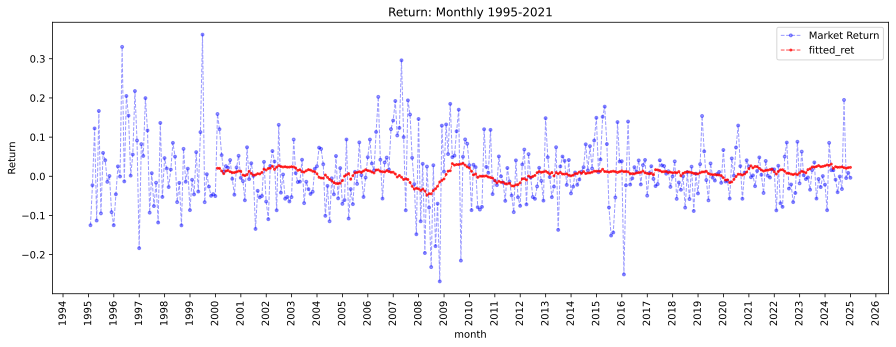

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 假设reg_data是已加载、以month为日期索引的DataFrame
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)  # (行数, 列数)的网格，选择第1个子图

# 绘制实际收益率ret（蓝色点标记、虚线）
ax.plot(
    reg_data['ret'],
    color='blue',
    marker='.',
    linestyle='--',
    linewidth=1,
    markersize=6,
    alpha=0.4,
    label='Market Return'
)

# 绘制拟合收益率fitted_ret（红色圈标记、虚线）
ax.plot(
    reg_data['fitted_ret'],
    color='red',
    marker='o',
    linestyle='--',
    linewidth=1,
    markersize=2,
    alpha=0.7,
    label='fitted_ret'
)

# 设置坐标轴与标题
plt.xlabel('month')  # 横轴标签
plt.ylabel('Return')  # 纵轴标签
plt.title("Return: Monthly 1995-2021")  # 图标题

# 配置x轴日期显示（按“年”展示）
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 旋转x轴日期标签，避免重叠
plt.xticks(rotation=90)

# 显示图例
plt.legend()

# 展示图形
plt.show()


In [ ]:
from statsmodels.iolib.summary2 import summary_col
reg_data['lcpi'] = reg_data['cpi'].shift(2)
reg_data['lpd'] = reg_data['pd'].shift(1)
reg_data['lpe'] = reg_data['pe'].shift(1)
reg_data['lpb'] = reg_data['pb'].shift(1)
info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

model_pd = smf.ols('ret ~ lpd',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
model_pe = smf.ols('ret ~ lpe',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
model_pb = smf.ols('ret ~ lpb',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
model_cpi = smf.ols('ret ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
model_pdto = smf.ols('ret ~ lpd + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
model_all = smf.ols('ret ~ lpd + lpe + lpb + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})

results_table = summary_col(results=[model_pd,model_pe, model_pb, model_cpi, model_pdto,model_all],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['1', '2', '3','4','5','6'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lpd','lpe','lpb','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Monthly Stock Market Return')

print(results_table)#构建模型对比不同指标的预测能力

    Table - OLS Regressions: Forecast Monthly Stock Market Return
                    1       2       3        4         5         6    
----------------------------------------------------------------------
Intercept        0.044   0.031   0.015*  0.021***  0.080     -0.131   
                 (0.090) (0.033) (0.009) (0.007)   (0.091)   (0.323)  
lpd              -0.003                            -0.005    0.032    
                 (0.008)                           (0.008)   (0.038)  
lpe                      -0.008                              -0.079*  
                         (0.012)                             (0.046)  
lpb                              -0.011                      0.022    
                                 (0.015)                     (0.045)  
lcpi                                     -0.007*** -0.007*** -0.009***
                                         (0.003)   (0.003)   (0.003)  
R-squared        0.001   0.002   0.004   0.034     0.036     0.051    
R-squared A

In [49]:
Qreg_data = reg_data.resample('Q').apply({
    'ret':
    lambda x: np.exp(sum(np.log( 1 + x))) - 1,
    'pe':
    lambda x: sum(x),
    'pb':
    lambda x: sum(x),
    'pd':
    lambda x: sum(x),
    'cpi':
    lambda x: sum(x),
})
Qreg_data

,ret,pe,pb,pd,cpi
month,,,,,
1995-03-31,-0.040492,8.349693,2.454375,35.121883,6.780000e+01
1995-06-30,-0.063176,8.005821,2.042218,34.608962,5.920000e+01
1995-09-30,0.087428,8.251599,2.205561,33.999484,4.440000e+01
1995-12-31,-0.204470,8.047842,1.976356,33.852774,3.340000e+01
1996-03-31,-0.022218,7.673771,1.633477,33.651385,2.810000e+01
...,...,...,...,...,...
2023-12-31,-0.047820,7.616137,0.619491,32.449624,-1.000000e+00
2024-03-31,0.006789,7.549200,0.490856,32.374321,-8.326673e-17
2024-06-30,-0.034157,7.762520,0.508222,32.446852,8.000000e-01


In [50]:
Qreg_data['lcpi'] = Qreg_data['cpi'].shift(1)
Qreg_data['lpd'] = Qreg_data['pd'].shift(1)
model_to = smf.ols('ret ~ lpd + lcpi',
                 data=Qreg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_to.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     3.664
Date:                Sun, 09 Nov 2025   Prob (F-statistic):             0.0292
Time:                        11:46:20   Log-Likelihood:                 50.174
No. Observations:                 100   AIC:                            -94.35
Df Residuals:                      97   BIC:                            -86.53
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3894      0.296      1.316      0.1

In [ ]:
from statsmodels.iolib.summary2 import summary_col
Qreg_data['lcpi'] = Qreg_data['cpi'].shift(1)
Qreg_data['lpd'] = Qreg_data['pd'].shift(1)
Qreg_data['lpe'] = Qreg_data['pe'].shift(1)
Qreg_data['lpb'] = Qreg_data['pb'].shift(1)

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

model_pd = smf.ols('ret ~ lpd',
                 data=Qreg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pe = smf.ols('ret ~ lpe',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_pb = smf.ols('ret ~ lpb',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('ret ~ lcpi',
                 data=Qreg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipd = smf.ols('ret ~ lpd + lcpi',
                 data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipe = smf.ols('ret ~ lpe + lcpi',
                 data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipb = smf.ols('ret ~ lpb + lcpi',
                 data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_all = smf.ols('ret ~ lpd + lpe + lpb + lcpi',
                 data=Qreg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_pd,model_pe, model_pb, model_cpi,model_cpipd,model_cpipe,model_cpipb,model_all],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['1', '2', '3','4','5','6','7','8'],
                            info_dict=info_dict,
                            regressor_order=['Intercept','lpd','lpe','lpb','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Quarterly Stock Market Return')

print(results_table)#构建多个模型对比收益率

             Table - OLS Regressions: Forecast Quarterly Stock Market Return
                    1       2       3       4         5         6         7         8    
-----------------------------------------------------------------------------------------
Intercept        0.294   0.166   0.063** 0.064*** 0.389     0.244*    0.098***  -0.479   
                 (0.312) (0.111) (0.031) (0.024)  (0.296)   (0.125)   (0.036)   (0.833)  
lpd              -0.008                           -0.009                        0.038    
                 (0.009)                          (0.009)                       (0.033)  
lpe                      -0.016                             -0.020              -0.088** 
                         (0.013)                            (0.014)             (0.043)  
lpb                              -0.018                               -0.016    0.016    
                                 (0.016)                              (0.014)   (0.039)  
lcpi                   

In [52]:
reg_data.columns

Index(['MarketR', 'MarketR_e', 'rfmonth', 'ret', 'ret_e', 'marketret3',
       'marketret6', 'marketret12', 'Q', 'Unnamed: 0', 'pd', 'pe', 'pb', 'cpi',
       'lpd', 'lcpi', 'fitted_ret', 'lpe', 'lpb'],
      dtype='object')

In [ ]:
# long horizontal regression table
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}


model_pd = smf.ols('marketret3 ~ lpd',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pe = smf.ols('marketret3 ~ lpe',
                    data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_pb = smf.ols('marketret3 ~ lpb',
                    data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('marketret3 ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipd = smf.ols('marketret3 ~ lpd + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipe = smf.ols('marketret3 ~ lpe + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipb = smf.ols('marketret3 ~ lpb + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_all = smf.ols('marketret3 ~ lpd + lpe + lpb + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_pd,model_pe, model_pb, model_cpi,model_cpipd,model_cpipe,model_cpipb,model_all],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['1', '2', '3','4','5','6','7','8'],
                            info_dict=info_dict,
                            regressor_order=['Intercept','lpd','lpe','lpb','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Long Horizon Stock Market Return')
print(results_table)#同上类似

            Table - OLS Regressions: Forecast Long Horizon Stock Market Return
                    1       2       3         4         5         6         7         8    
-------------------------------------------------------------------------------------------
Intercept        0.265   0.141*  0.057*** 0.062***  0.373*    0.227***  0.093***  -0.232   
                 (0.205) (0.077) (0.021)  (0.018)   (0.199)   (0.087)   (0.025)   (0.695)  
lpd              -0.021                             -0.027                        0.079    
                 (0.018)                            (0.017)                       (0.077)  
lpe                      -0.040                               -0.054*             -0.221** 
                         (0.027)                              (0.029)             (0.103)  
lpb                              -0.049                                 -0.044    0.061    
                                 (0.032)                                (0.030)   (0.112)  
l

In [ ]:
# long horizontal regression table
from statsmodels.iolib.summary2 import summary_col
info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}


model_pd = smf.ols('marketret6 ~ lpd',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pe = smf.ols('marketret6 ~ lpe',
                    data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_pb = smf.ols('marketret6 ~ lpb',
                    data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('marketret6 ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipd = smf.ols('marketret6 ~ lpd + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipe = smf.ols('marketret6 ~ lpe + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipb = smf.ols('marketret6 ~ lpb + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_all = smf.ols('marketret6 ~ lpd + lpe + lpb + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_pd,model_pe, model_pb, model_cpi,model_cpipd,model_cpipe,model_cpipb,model_all],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['1', '2', '3','4','5','6','7','8'],
                            info_dict=info_dict,
                            regressor_order=['Intercept','lpd','lpe','lpb','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Long Horizon Stock Market Return')
print(results_table)#依旧同上

             Table - OLS Regressions: Forecast Long Horizon Stock Market Return
                    1        2        3         4         5         6         7         8    
---------------------------------------------------------------------------------------------
Intercept        0.779**  0.377*** 0.145*** 0.108***  0.961***  0.520***  0.200***  -0.653   
                 (0.359)  (0.137)  (0.041)  (0.033)   (0.345)   (0.149)   (0.047)   (0.951)  
lpd              -0.063**                             -0.073**                      0.163    
                 (0.032)                              (0.030)                       (0.110)  
lpe                       -0.111**                              -0.135***           -0.375** 
                          (0.047)                               (0.048)             (0.180)  
lpb                                -0.133**                               -0.128*** 0.008    
                                   (0.053)                                

In [ ]:
# long horizontal regression table
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}


model_pd = smf.ols('marketret12 ~ lpd',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pe = smf.ols('marketret12 ~ lpe',
                    data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_pb = smf.ols('marketret12 ~ lpb',
                    data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('marketret12 ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipd = smf.ols('marketret12 ~ lpd + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipe = smf.ols('marketret12 ~ lpe + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpipb = smf.ols('marketret12 ~ lpb + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_all = smf.ols('marketret12 ~ lpd + lpe + lpb + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_pd,model_pe, model_pb, model_cpi,model_cpipd,model_cpipe,model_cpipb,model_all],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['1', '2', '3','4','5','6','7','8'],
                            info_dict=info_dict,
                            regressor_order=['Intercept','lpd','lpe','lpb','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Long Horizon Stock Market Return')
print(results_table)#同上

              Table - OLS Regressions: Forecast Long Horizon Stock Market Return
                     1         2         3        4         5         6         7         8    
-----------------------------------------------------------------------------------------------
Intercept        2.169***  1.025***  0.406***  0.184*** 2.457***  1.247***  0.476***  -4.008***
                 (0.532)   (0.210)   (0.089)   (0.071)  (0.518)   (0.223)   (0.103)   (1.208)  
lpd              -0.178***                              -0.195***                     0.547*** 
                 (0.045)                                (0.042)                       (0.147)  
lpe                        -0.307***                              -0.347***           -0.548*  
                           (0.067)                                (0.064)             (0.317)  
lpb                                  -0.393***                              -0.391*** -0.667** 
                                     (0.078)           